In [ ]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#read the file
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [5]:
df.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [45]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

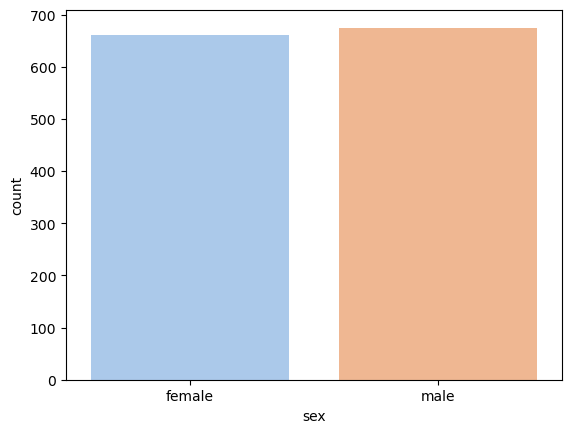

In [9]:
sns.countplot(x='sex',data=df,palette='pastel')
plt.show()

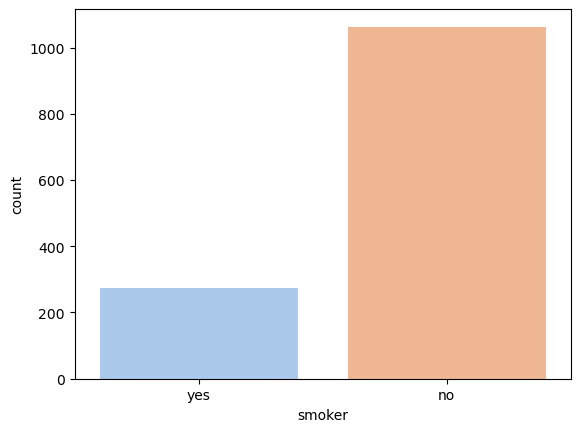

In [10]:
sns.countplot(x='smoker',data=df,palette='pastel')
plt.show()

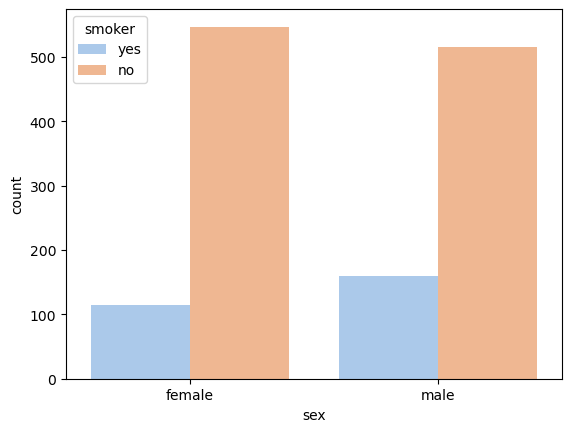

In [11]:
sns.countplot(x='sex',data=df,hue = "smoker",palette='pastel')
plt.show()

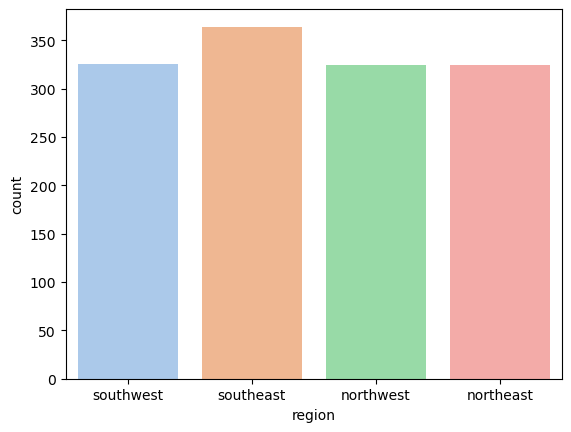

In [12]:
sns.countplot(x='region',data=df,palette='pastel')
plt.show()

<Axes: xlabel='children', ylabel='count'>

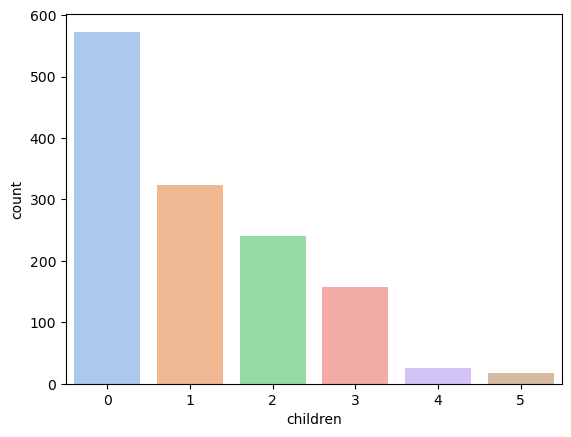

In [13]:
sns.countplot(x='children',data=df,palette='pastel')


<Axes: ylabel='Density'>

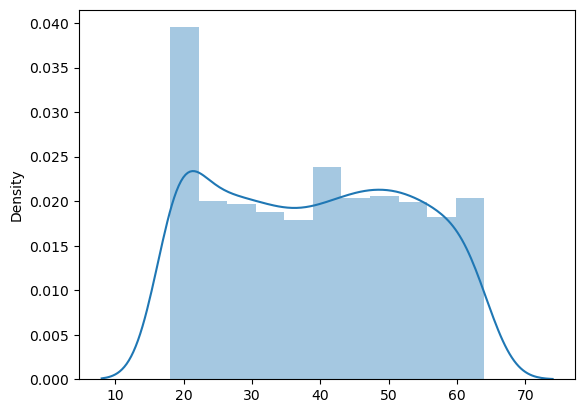

In [14]:
sns.distplot(x = df['age'])


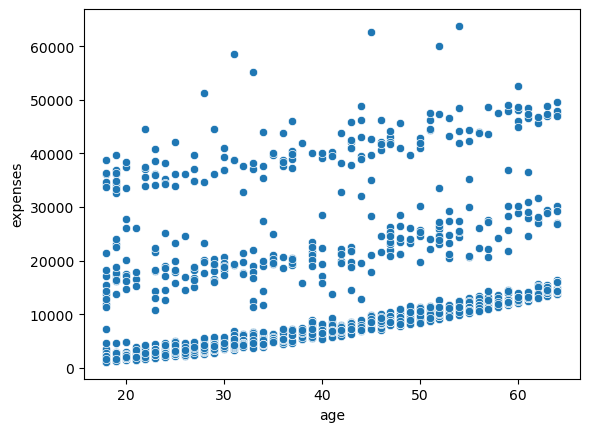

In [15]:
sns.scatterplot(x = df['age'],y = df['expenses'])
plt.show()

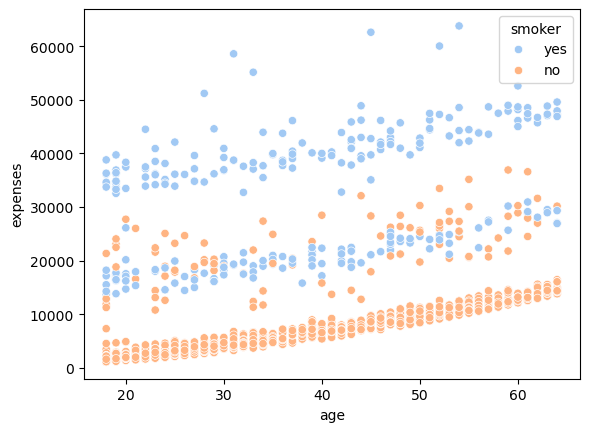

In [16]:
sns.scatterplot(x = df['age'],y = df['expenses'],hue =df ['smoker'],palette='pastel')
plt.show()

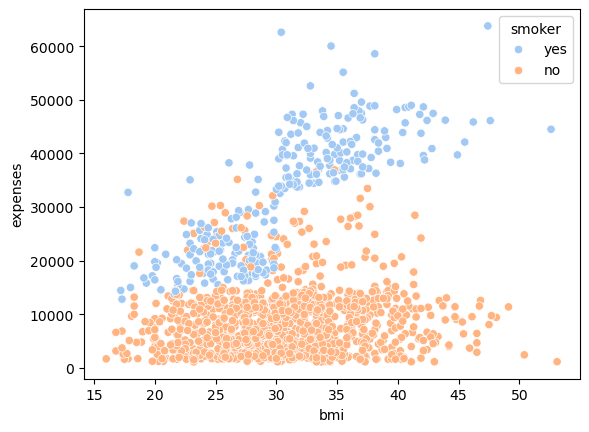

In [17]:
sns.scatterplot(x = df['bmi'],y = df['expenses'],hue =df ['smoker'],palette='pastel')
plt.show()

In [18]:
 #numerical
num_fea = df[['age','bmi','children','expenses']]
num_fea.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [19]:
#get the corelation matix
num_fea.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<Axes: >

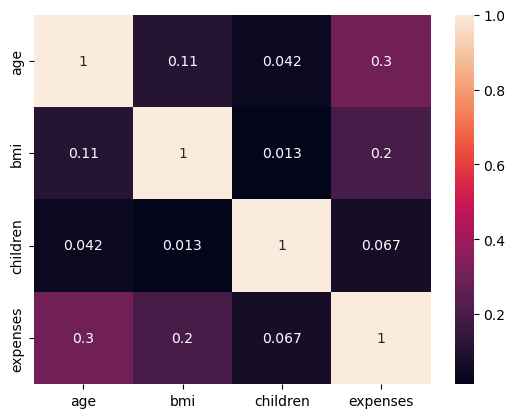

In [20]:
heatmap = num_fea.corr()
sns.heatmap(heatmap,annot=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [22]:
#get dummies on data
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


<Axes: >

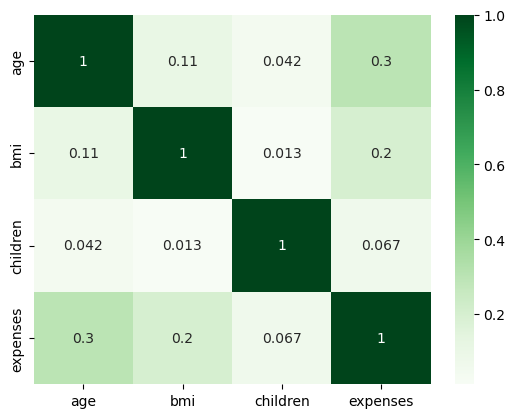

In [23]:
heatmap = num_fea.corr()
sns.heatmap(heatmap,annot=True,cmap='Greens')

In [24]:
#Apply mimax scaling


In [25]:
#indepencdent and dependent features
x= df.drop('expenses',axis=1)#independent
y=df['expenses']#dependent
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,False,True,False,False,True
1,18,33.8,1,True,False,False,True,False
2,28,33.0,3,True,False,False,True,False
3,33,22.7,0,True,False,True,False,False
4,32,28.9,0,True,False,True,False,False


In [26]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [27]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['age','bmi']]=scaler.fit_transform(df[['age','bmi']])

In [28]:
x.describe()

,age,bmi,children
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737
std,14.044333,6.100664,1.205571
min,18.000000,16.000000,0.000000
25%,27.000000,26.300000,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.700000,2.000000
max,64.000000,53.100000,5.000000


In [29]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=22)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 8), (268, 8), (1069,), (268,))

In [30]:
#linear regression
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score
LR_Accuracy =round(r2_score(y_test,model_LR.predict(x_test))*100)
LR_Accuracy


75

In [32]:
#decission tree
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor()
model_DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model_DTR.predict(x_test)) * 100)
DTR_Accuracy

64

In [34]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

SVR()

In [35]:

from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
SVR_Accuracy

-13

In [36]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [37]:
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(x_test)) * 100)
RFR_Accuracy

80

In [38]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(x_test_poly)) * 100)
PR_Accuracy

82

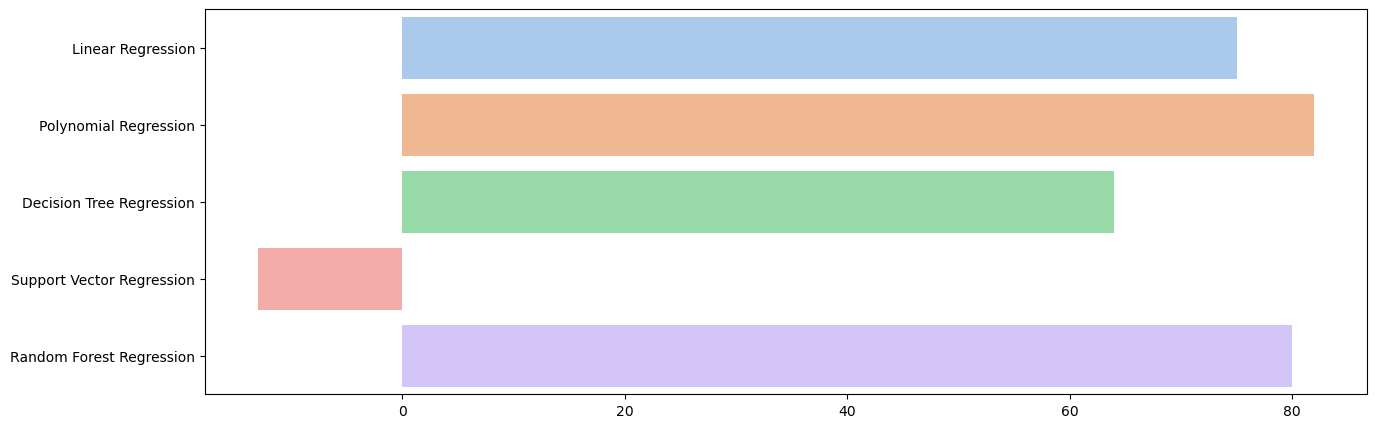

In [39]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LR_Accuracy, PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel');

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)   # x = training features (8 columns)


MinMaxScaler()

In [41]:
input_data = (19, 27.9, 2, 0, 0, 0, 1, 0)
input_data = np.asarray(input_data).reshape(1, -1)
input_data = scaler.transform(input_data)
prediction = RF_model.predict(input_data)


In [42]:
# SAVE THE RANDOMFOREST MODEL 
import pickle
pickle.dump(RF_model,open('RF_model.pkl','wb'))

In [44]:
#save scalar parameters
pickle.dump(scaler,open('scalar.pkl', 'wb'))